In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [14]:
# Using os.listdir() we are able to list the name of all files in a folder:
pd.set_option('display.max_columns', None)
df = pd.read_excel(r"c://Users/ilike/1.data/data_mid_bootcamp_project_regression/regression_data.xls")
display(df.head(1))


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900


In [15]:
df[df['price']>1000000].count()

id               1458
date             1458
bedrooms         1458
bathrooms        1458
sqft_living      1458
sqft_lot         1458
floors           1458
waterfront       1458
view             1458
condition        1458
grade            1458
sqft_above       1458
sqft_basement    1458
yr_built         1458
yr_renovated     1458
zipcode          1458
lat              1458
long             1458
sqft_living15    1458
sqft_lot15       1458
price            1458
dtype: int64

#### Data Types
* no Na values
* All are classified as numerical values

In [16]:
# Checking types within the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [17]:
#create df1 for make some further changes
df1=df.copy()
df1.head(1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900


#### See Distributions
From the distributions we can will do sanity check, get some insights and validate our sample.

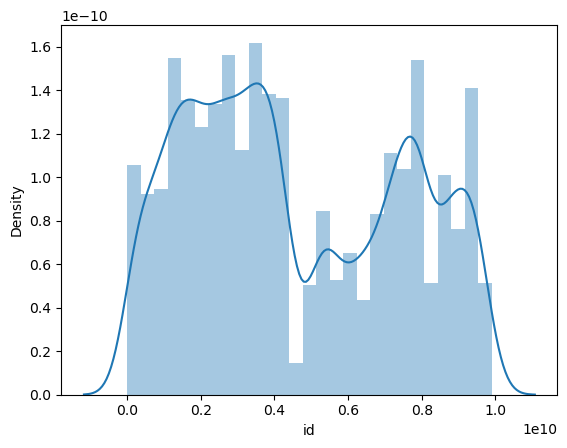

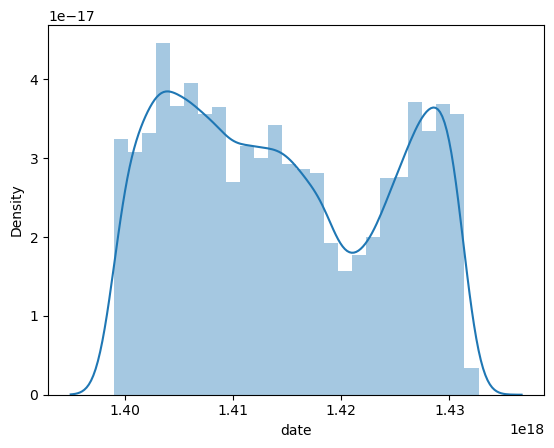

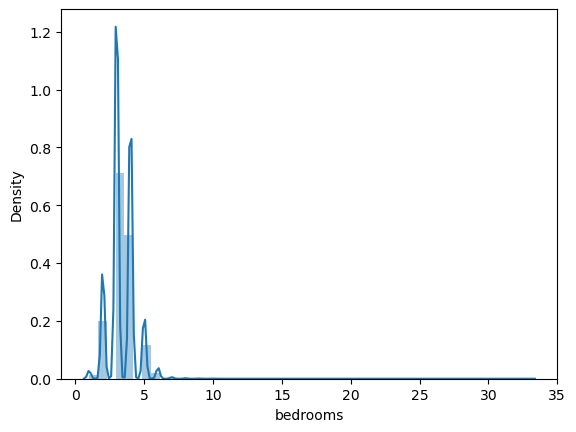

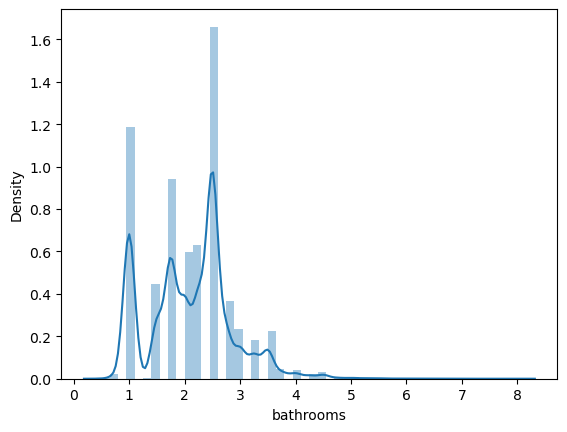

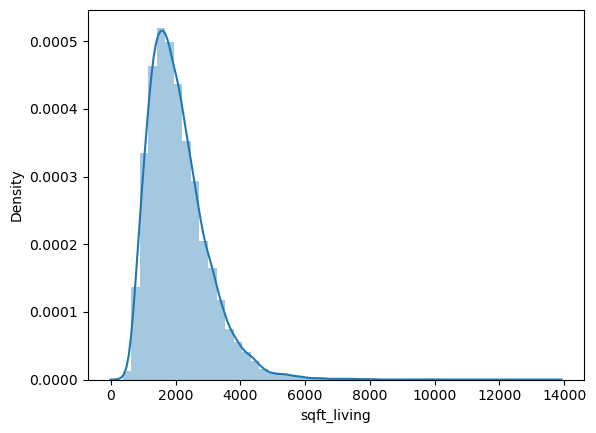

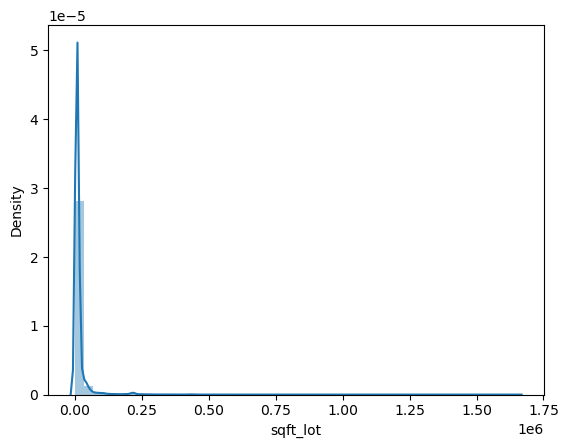

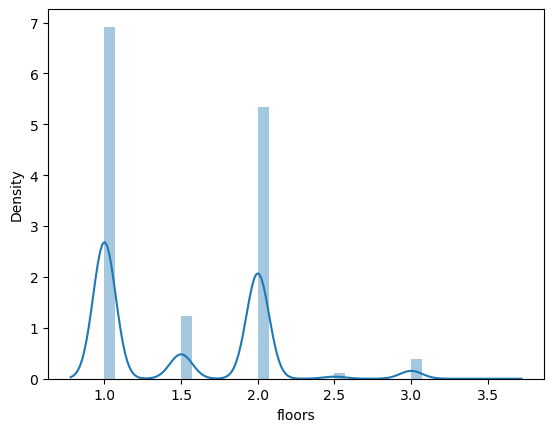

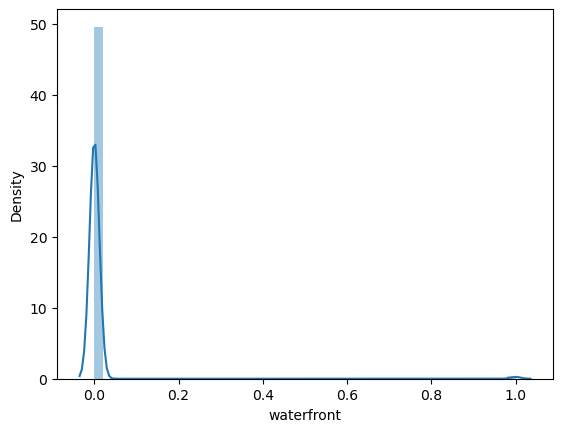

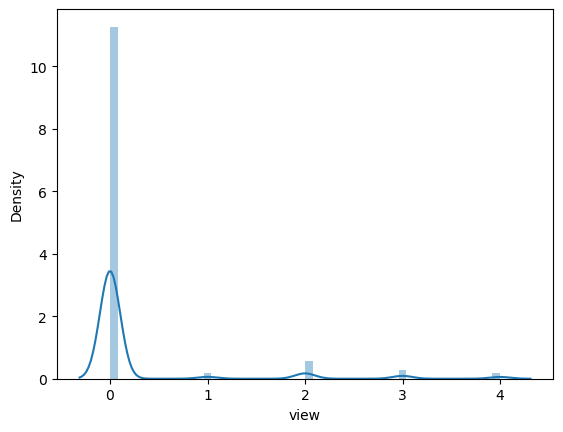

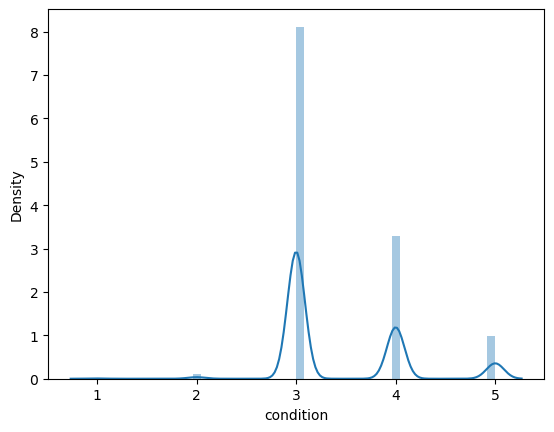

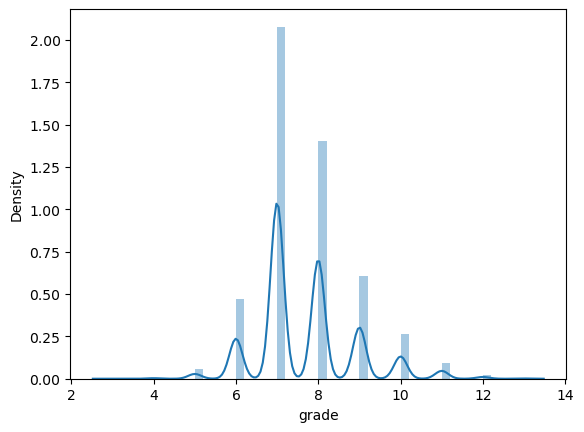

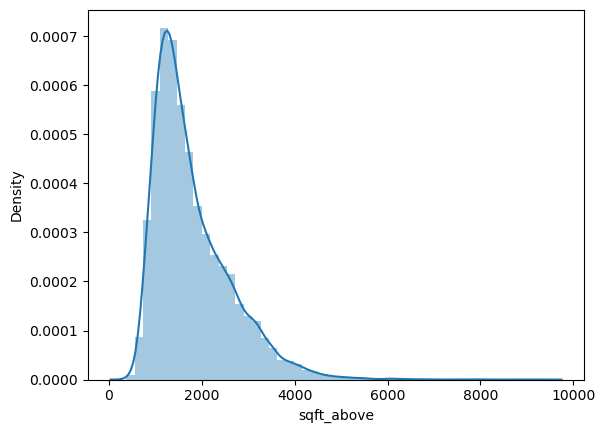

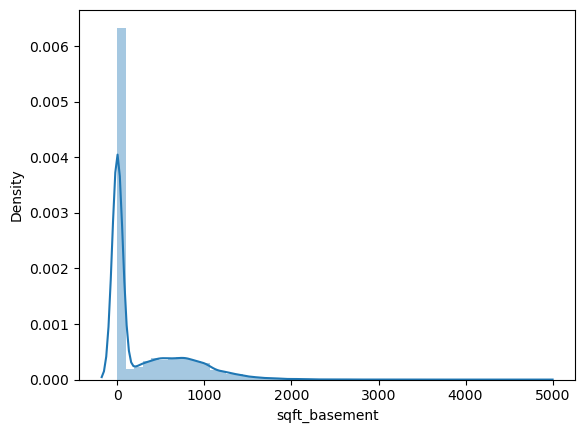

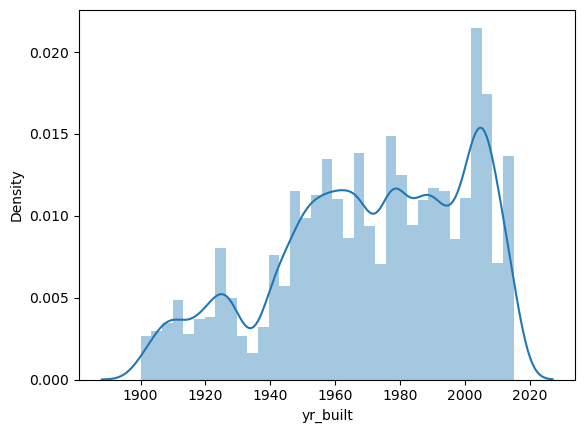

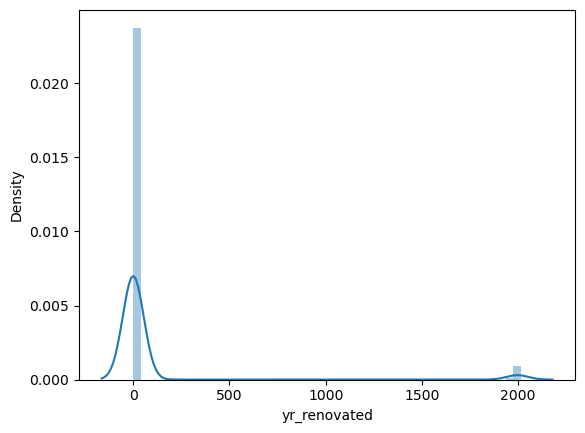

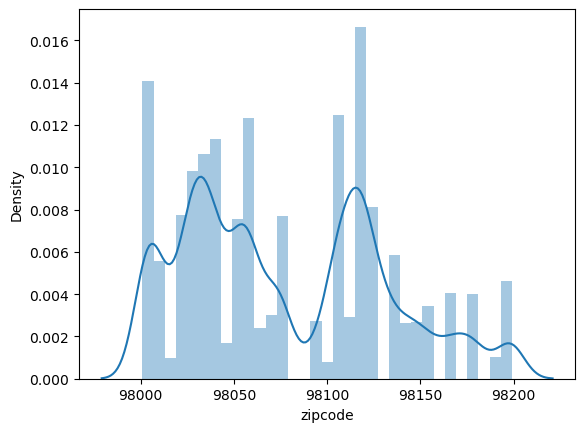

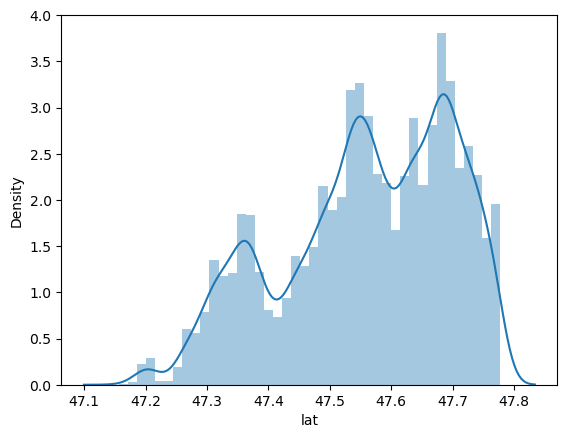

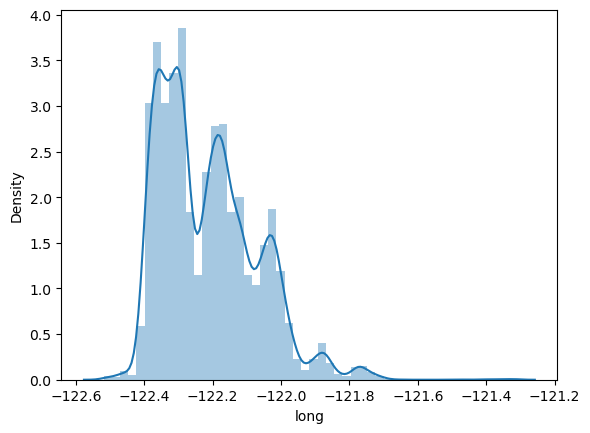

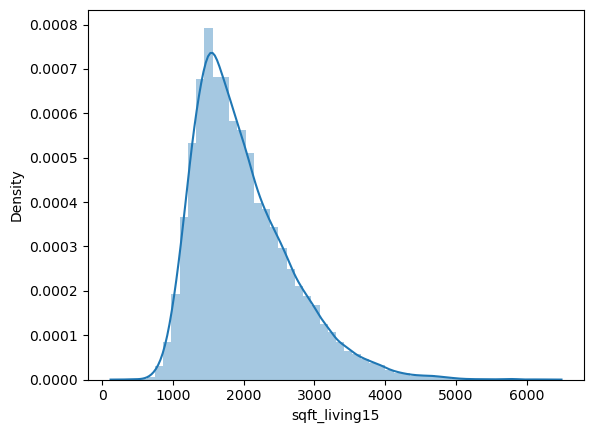

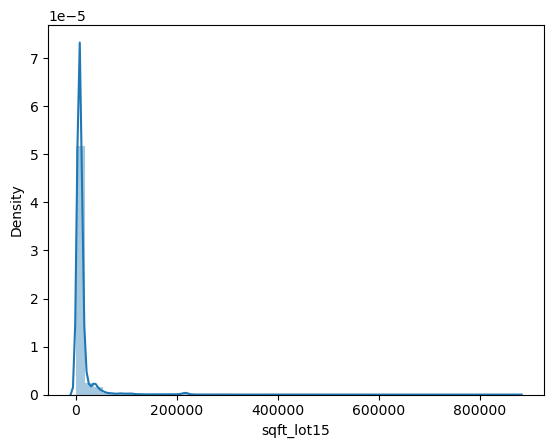

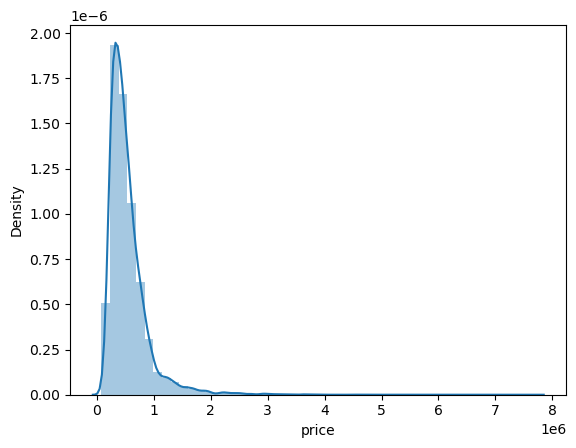

In [18]:
# Let's check the distribution on the numerical columns:
for col in df1.columns:
    sns.distplot(df1[col])
    plt.show()

Use corr() to find correlations with price
#### below columns have higher correlation with house price
* sqft_living, grade, sqft_above, sqft_living15, bathrooms.

#### Lower correlation with house price
* id, long, condition, yr_built, sqft_lot15, sqft_lot, yr_renovated

In [19]:
# For numerical features we have pearson / spearman correlation measure:
correlations_matrix = df1.corr()

correlations_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Let's observe the house price range and its distribution.

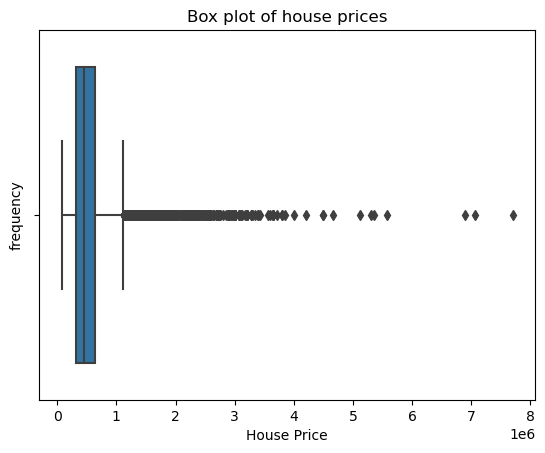

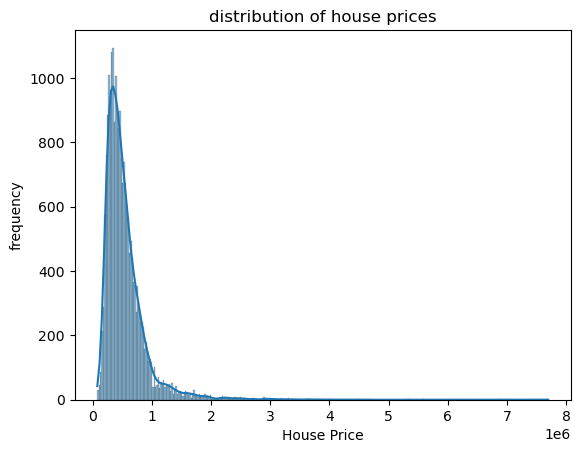

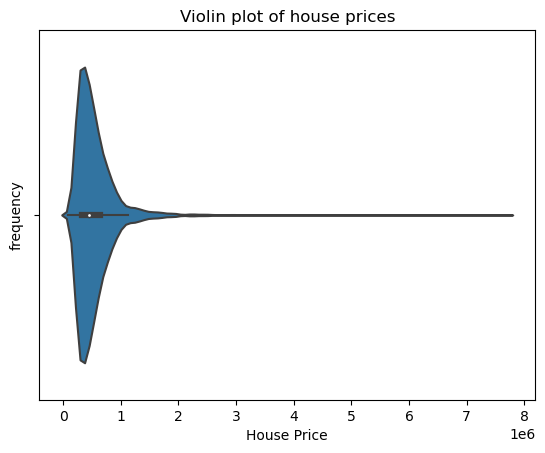

Mean price 540297.0
Median price 450000.0
Minimum price 78000
Maximum price 7700000


In [20]:
df1.head(1)
sns.boxplot(df1["price"])
plt.xlabel('House Price')
plt.ylabel('frequency')
plt.title('Box plot of house prices')
plt.show()

sns.histplot(df1["price"], kde = True)
plt.xlabel('House Price')
plt.ylabel('frequency')
plt.title('distribution of house prices')
plt.show()

sns.violinplot(df1["price"])
plt.xlabel('House Price')
plt.ylabel('frequency')
plt.title('Violin plot of house prices')
plt.show()

print("Mean price", round(df1['price'].mean(),0))
print("Median price", df1['price'].median())
print("Minimum price", df1['price'].min())
print("Maximum price", df1['price'].max())

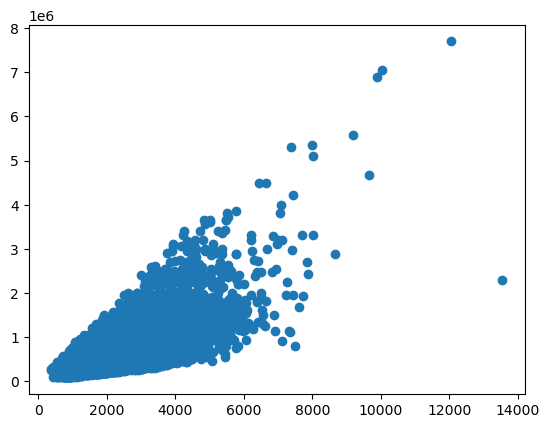

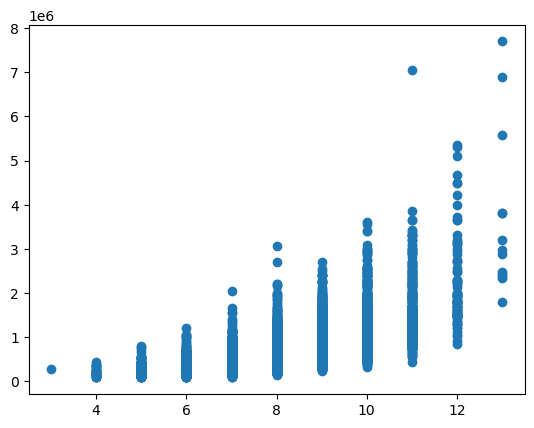

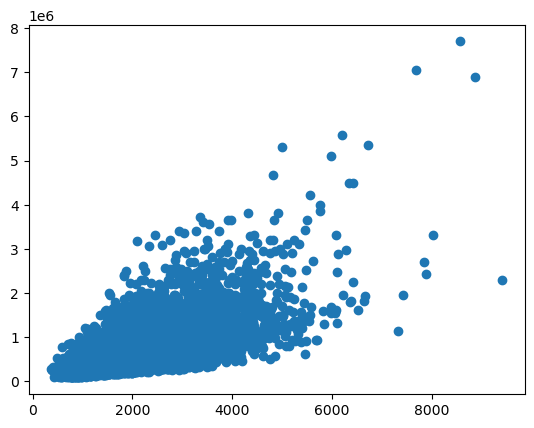

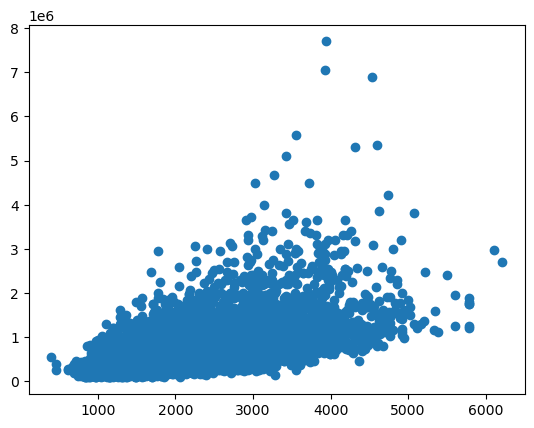

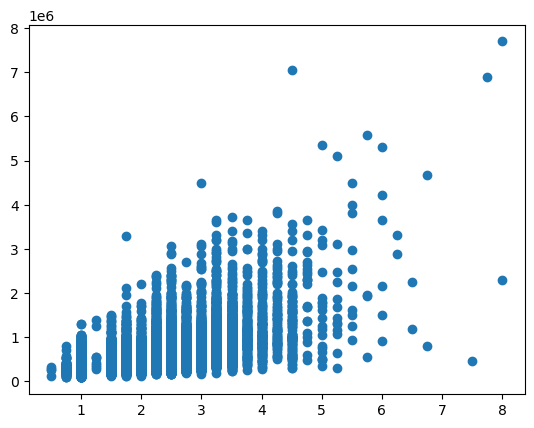

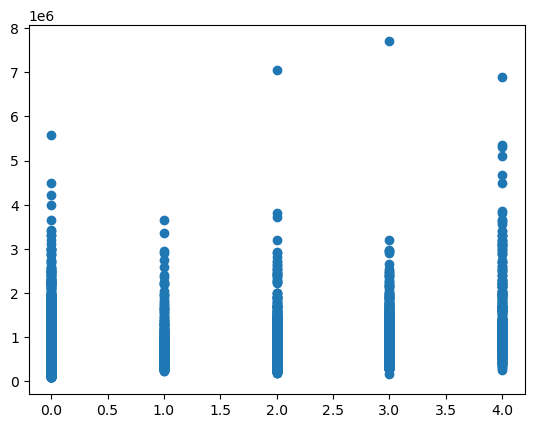

In [21]:
plt.scatter(df1["sqft_living"],df1["price"])
plt.show()
plt.scatter(df1["grade"],df1["price"])
plt.show()
plt.scatter(df1["sqft_above"],df1["price"])
plt.show()
plt.scatter(df1["sqft_living15"],df1["price"])
plt.show()
plt.scatter(df1["bathrooms"],df1["price"])
plt.show()
plt.scatter(df1["view"],df1["price"]) # almost no correlation with price
plt.show()

### There's no higher multicolinearity than 9, so no reduntant data which need to be removed

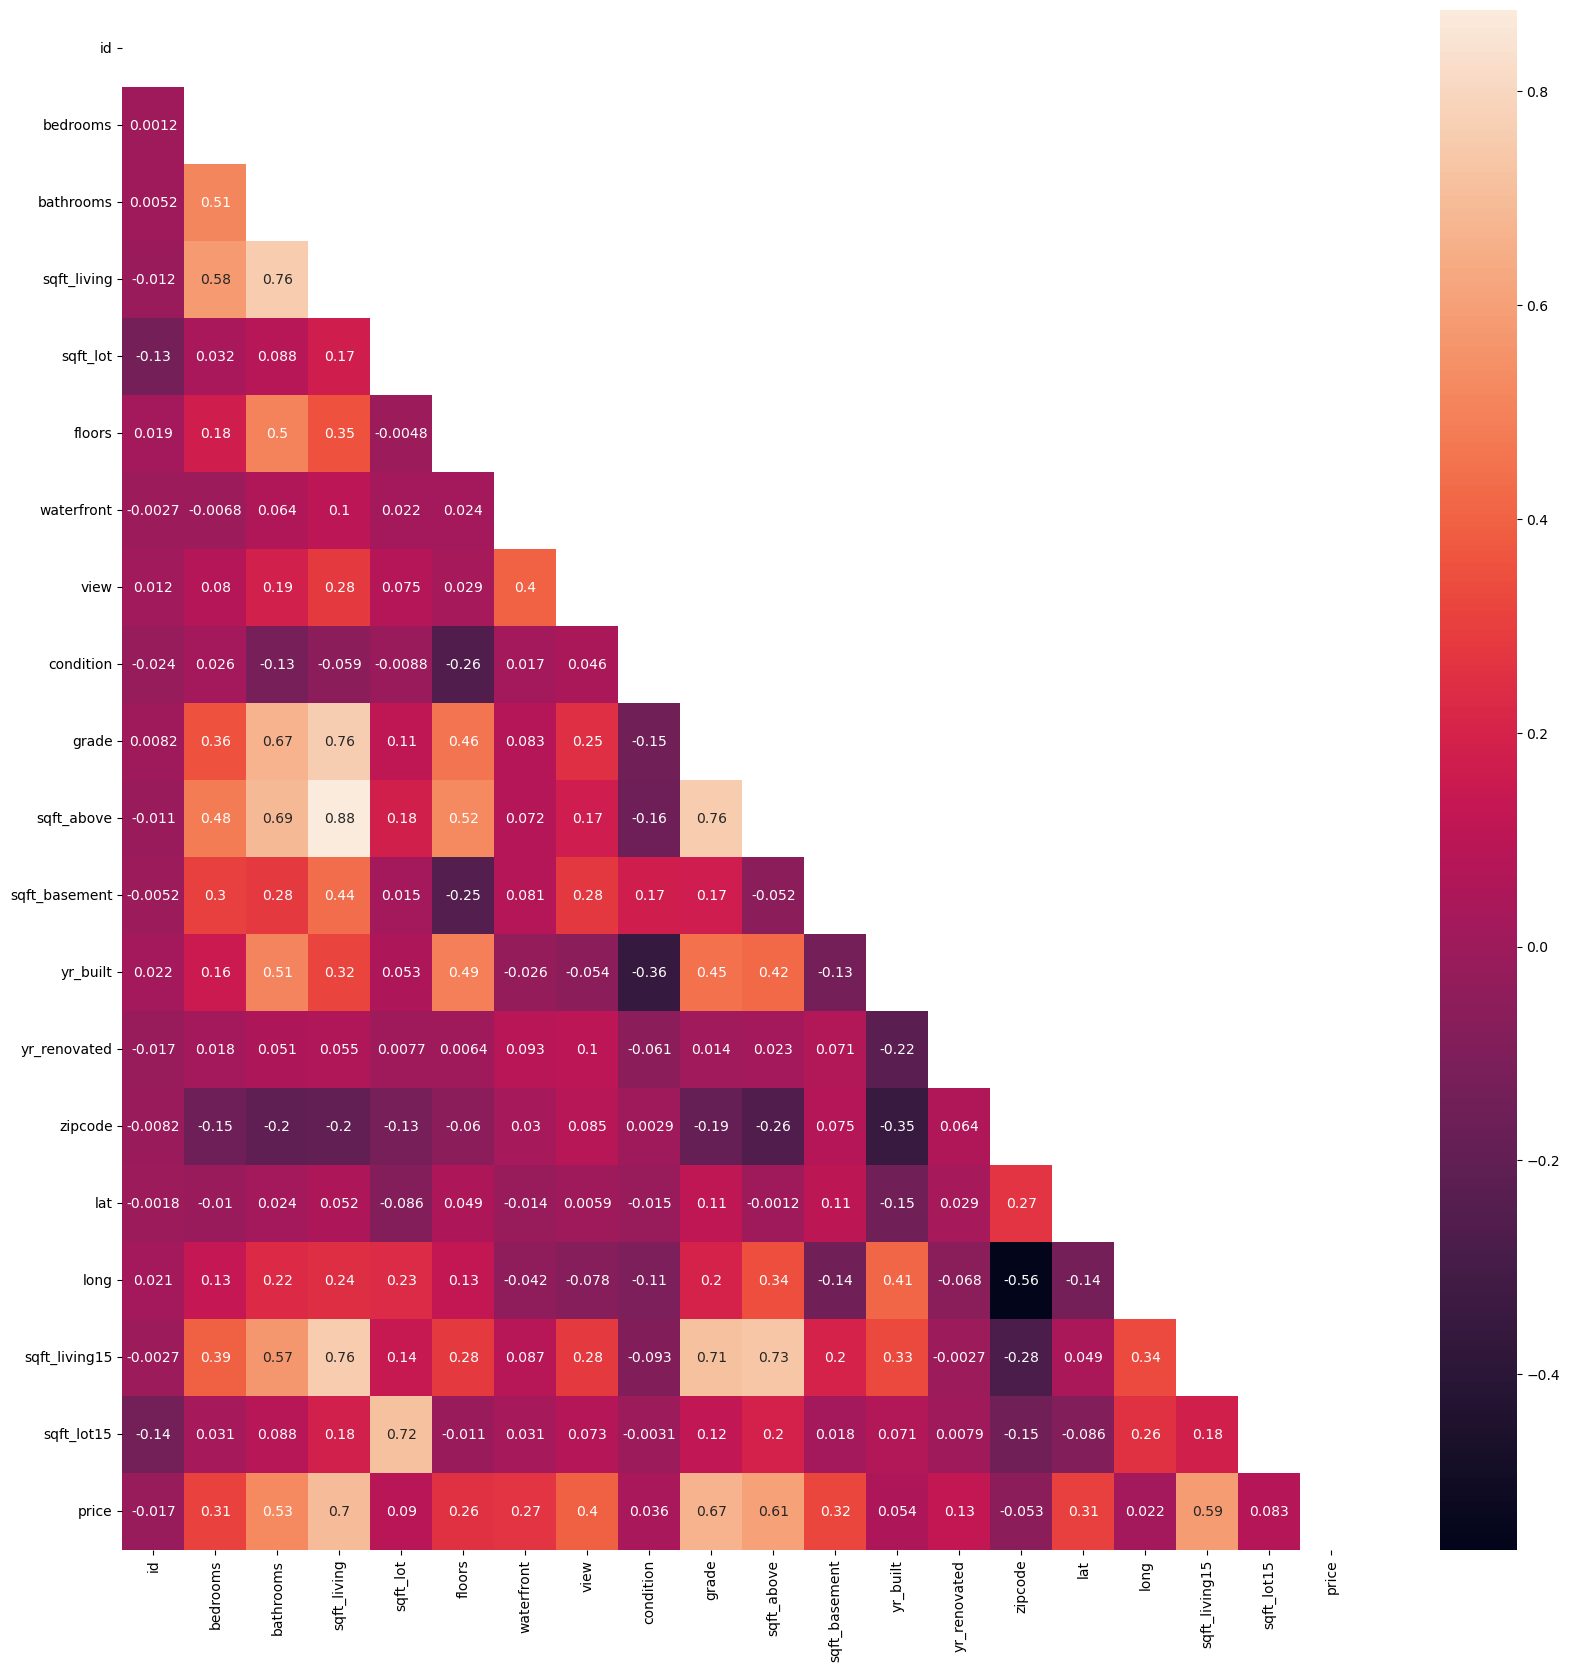

In [22]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# in this example, we could drop columns: ic1, ic2, ic3, hvp1

### Splitting the Data

For us to be able to train an algorithm we will need to split the features from the target, also referred to as X-y split.

To make sure our model will not *overfit* and will present similar success results when we use it in real life, we will also be splitting the dataset into training and testing data.

In [23]:
# X-y split: here we keep only the data we will use to train the model
X = df1.drop(["id","yr_renovated","date","zipcode","lat","long","price"], axis=1)
y = df1["price"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

X_train.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
3310,3,2.5,2230,32660,1.0,0,0,4,8,2230,0,1977,2400,33120


### Feature Scaling

Scaling is important for ensuring that features with different scales or units contribute equally to the machine learning model.

In [24]:
# Start the scaler object:
scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage:
scaler.fit(X_train)

# Transform training and the testing data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model

In summary, train-test split helps us ensure that the machine learning model we develop is both accurate and generalizable to new data.

In [25]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", round(rmse,0))
print("MAE:", round(mae,0))

R2_score: 0.65
RMSE: 211865.0
MAE: 138323.0


### What the metrics reveal: 
##### As a result, the linear regression is not performing well. I need  to customize data and clean it further.

* R2 of 0.66, Looks bad.
* RMSE of 221199 seems quite high, considering the price range is 78000 ~ 7700000
* MAE of 138703 looks also quite high.

#### House price range / mean
* Mean price 540297
* Median price 450000
* Minimum price 78000
* Maximum price 7700000



Text(0.5, 1.0, 'Linear Regression of Original data *R2_score: 0.65, *RMSE: 211865.0, * MAE: 138323.0')

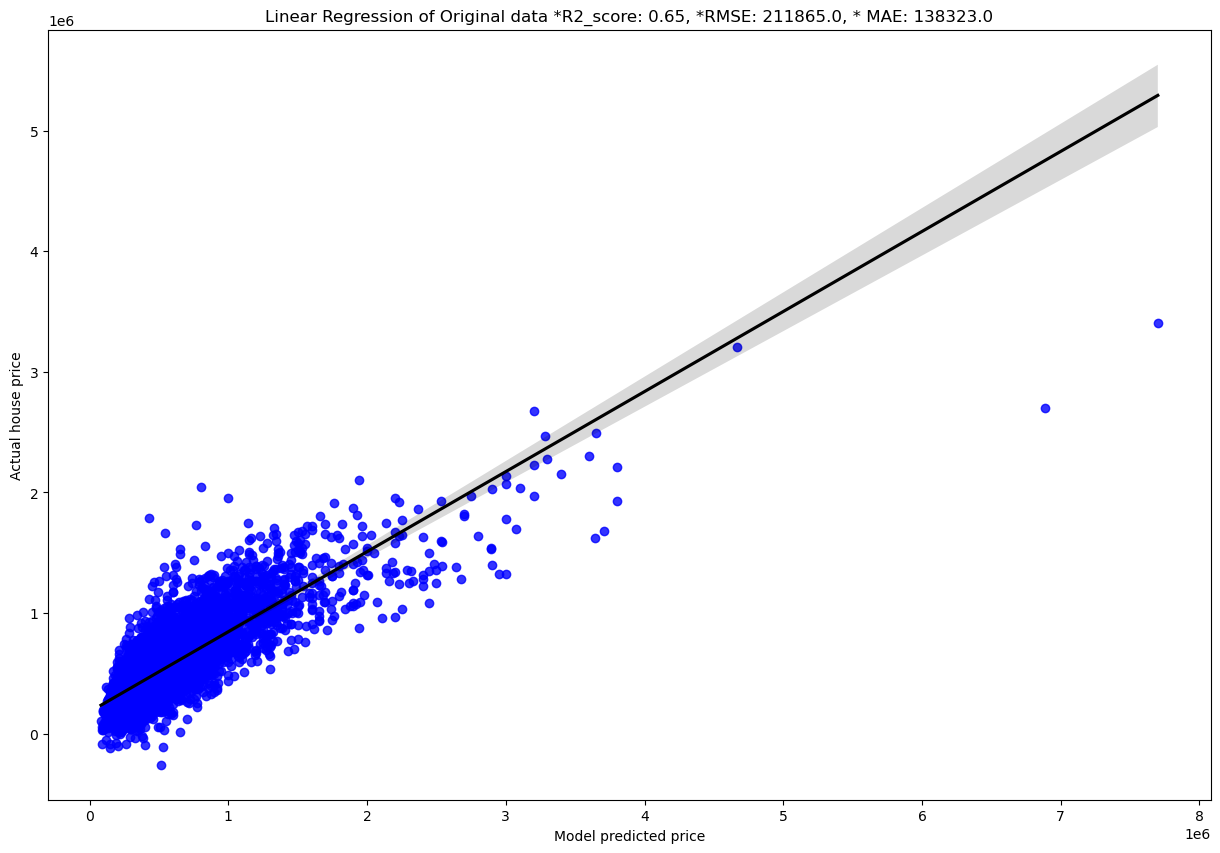

In [26]:
# A good place to start is by getting the regression prot from the predictions vs the true values:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "blue"})
plt.xlabel("Model predicted price")
plt.ylabel("Actual house price")
plt.title("Linear Regression of Original data *R2_score: 0.65, *RMSE: 211865.0, * MAE: 138323.0")

### How to improve the model ? 
#### I'd like to perform one-hot encoding for the better machine learning process.
* zipcode

In [27]:
#make df1 as backup dataframe
df2 = df1.copy()

In [28]:
df2.head(1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900


In [29]:
df2 = df2.drop(["id","date","lat","long"],axis=1)

### create another dataframe zipcode one-hot encoding applied
* df3 (df2 + one hot endcoded df - zipcode)

In [30]:
df2['zipcode'] = df2['zipcode'].astype(str)
endcodeZip = pd.get_dummies(df2['zipcode'], prefix='zip')
df3 = pd.concat([df2, endcodeZip], axis = 1)
df3.drop(['zipcode','yr_renovated'], axis = 1, inplace=True)
df3.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### spliting the data using df3
* train / test
* remove yr_built, yr_renovated, price(target itself) yr_b/renovated, had very less correlation with price

#### naming of train/test sets
* X_trainZ, X_testZ, y_trainZ, y_testZ

In [31]:
X = df3.drop(["price"], axis = 1)
y = df3["price"]

In [32]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 10)

In [33]:
print("size of train,test each", len(X_trainZ),len(X_testZ))

NameError: name 'X_trainZ' is not defined

Want to see results without scaleling as we performed one hot encoding (log 1 is equal to 0).
* X_train, y_train < to train lm.fit
* Zip_predictions <- prediction results by lm.predict 

In [34]:
lm1 = LinearRegression()
lm1.fit(X_train1, y_train)
predictions1 = lm1.predict(X_test1)

rmse1 = mean_squared_error(y_test, predictions1, squared = False)
mae1 = mean_absolute_error(y_test, predictions1)
print("R2_score:", round(r2_score(y_test, predictions1),2))
print("RMSE:", round(rmse1,0))
print("MAE:", round(mae1,0))

R2_score: 0.8
RMSE: 160493.0
MAE: 96722.0


### after one-hot encoding linear regression shows much better R2_score RMSE, MAE

#### without one-hot encoding
* R2_score: 0.65
* RMSE: 211865.0
* MAE: 138323.0

#### with on-hot encoding
* R2_score: 0.8
* RMSE: 160493.0
* MAE: 96722.0

Text(0.5, 1.0, 'Zipcode encoded *R2_score: 0.8, RMSE:160493, MAE:96722 ')

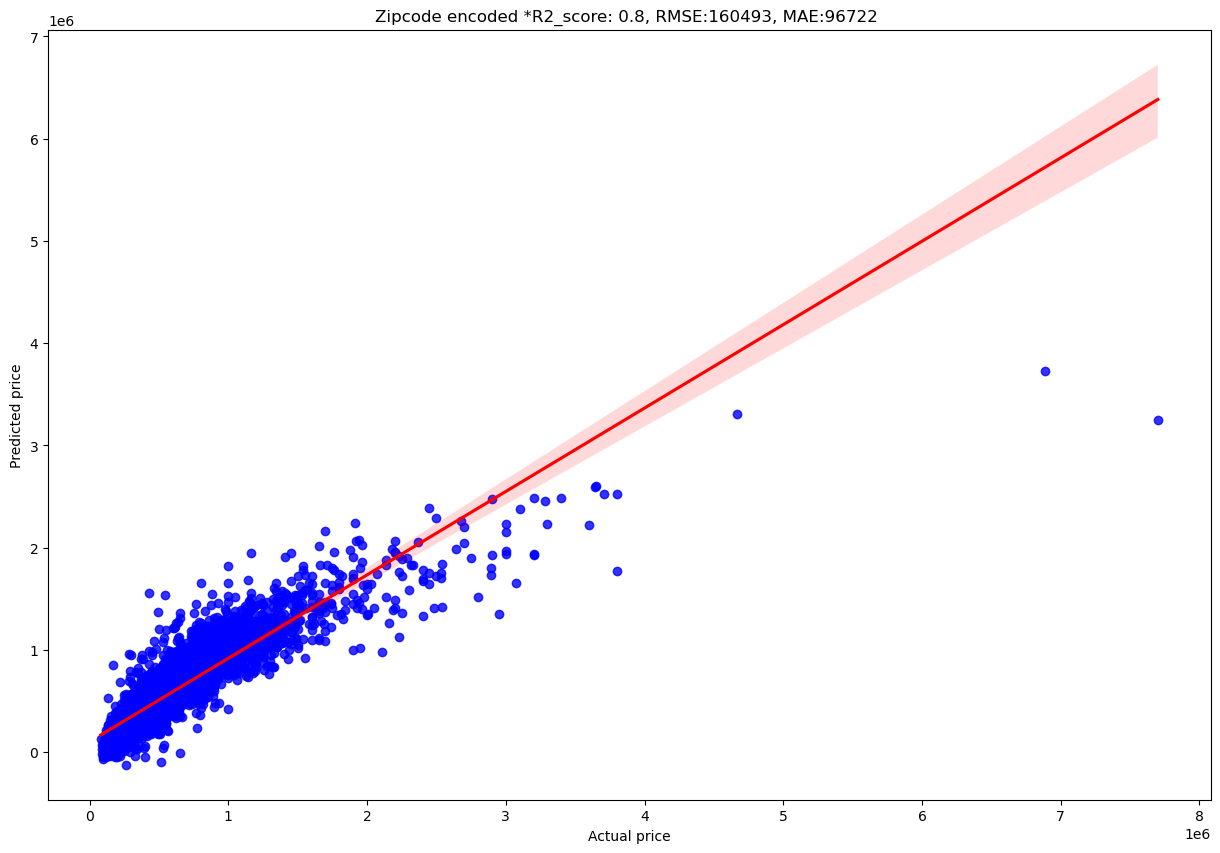

In [35]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=y_test, y=predictions1, line_kws={"color":"red"}, scatter_kws={"color":"blue"})
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Zipcode encoded *R2_score: 0.8, RMSE:160493, MAE:96722 ')

### Let's scale zip-code one-hot encoded train model it with scalar 

In [36]:
# Start the scaler object:
scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage:
scaler.fit(X_train1)

# Transform training and the testing data:
X_train1_scaled = scaler.transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

In [37]:
# onehot encoding Z + Scaling
lm2 = LinearRegression()
lm2.fit(X_train1_scaled, y_train)
predictions2 = lm2.predict(X_test1_scaled)

rmse2 = mean_squared_error(y_test, predictions2, squared = False)
mae2 = mean_absolute_error(y_test, predictions2)
print("R2_score:", round(r2_score(y_test, predictions2),2))
print("RMSE:", round(rmse2,0))
print("MAE:", round(mae2,0))

R2_score: 0.8
RMSE: 160489.0
MAE: 96737.0


#### without one-hot encoding
* R2_score: 0.65
* RMSE: 211865.0
* MAE: 138323.0

#### with on-hot encoding
* R2_score: 0.8
* RMSE: 160493.0
* MAE: 96722.0

#### with on-hot encoding + scaling - slightly improved but similar
* R2_score: 0.8
* RMSE: 160489.0
* MAE: 96737.0

In [38]:
# Log scaling the price
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

y_train_scaled

3310     12.966878
8427     12.618513
13624    12.992255
15220    13.017003
9054     12.992255
           ...    
9372     13.864301
7291     13.171154
17728    13.784536
7293     13.253392
17673    13.079456
Name: price, Length: 12958, dtype: float64

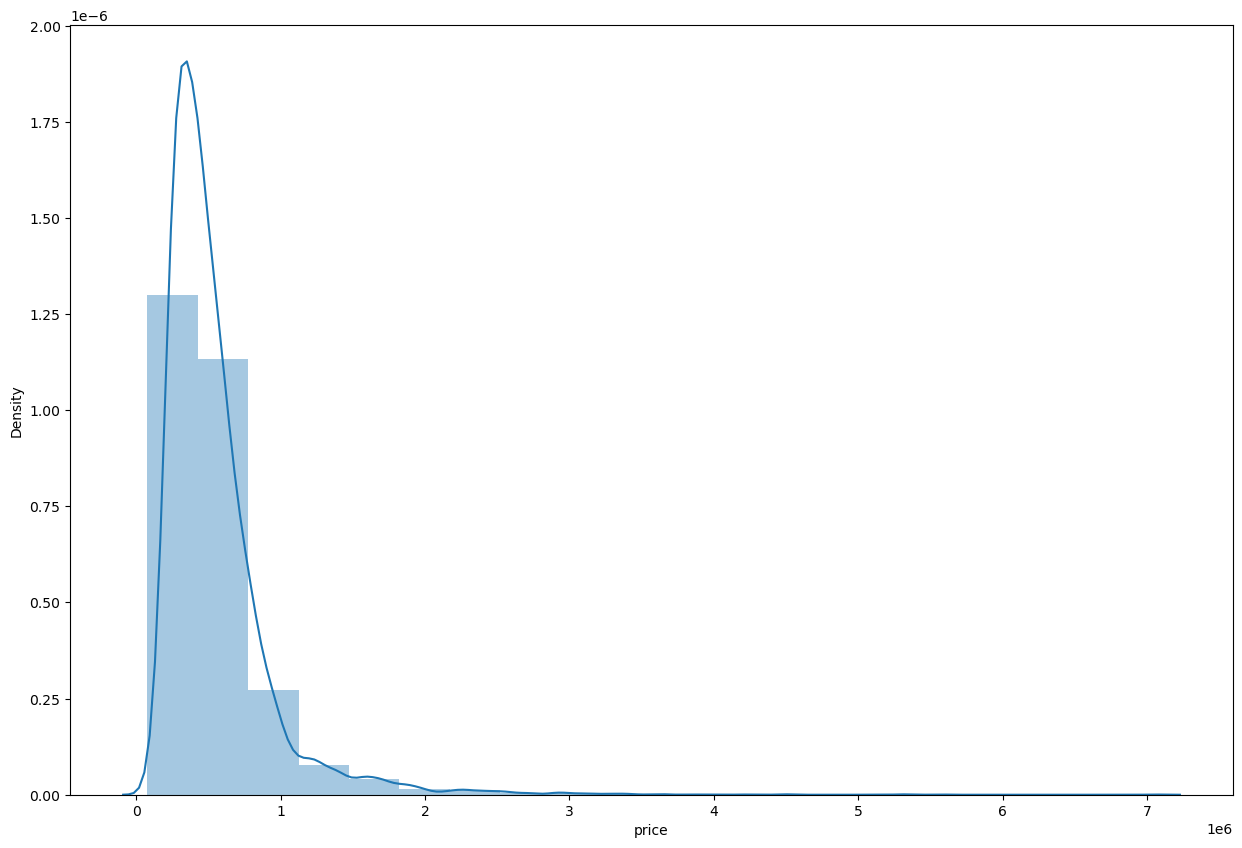

<AxesSubplot:xlabel='price', ylabel='Density'>

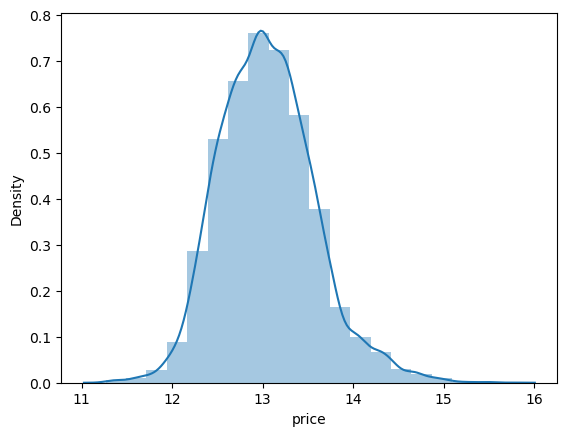

In [39]:
# Look at how log scaling changed the distribution:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.distplot(y_train, bins = 20)
plt.show()
sns.distplot(y_train_scaled, bins=20)

In [40]:
# Now let's check the model:

lm3 = LinearRegression()
lm3.fit(X_train1_scaled, y_train_scaled)

predictions3 = lm3.predict(X_test1_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions3), 2)) 
# here we are only checking R2 because MAE and RMSE becomes hard to interpret when we scale the target variable (we will see this in another class)

R2_score: 0.87


There was even more improvement in R2 value, we can see on the plot that the points are more clustered around the regression line.

Text(0.5, 1.0, 'Zipcode one-hot encoded, house price to log scale *R2_score: 0.87')

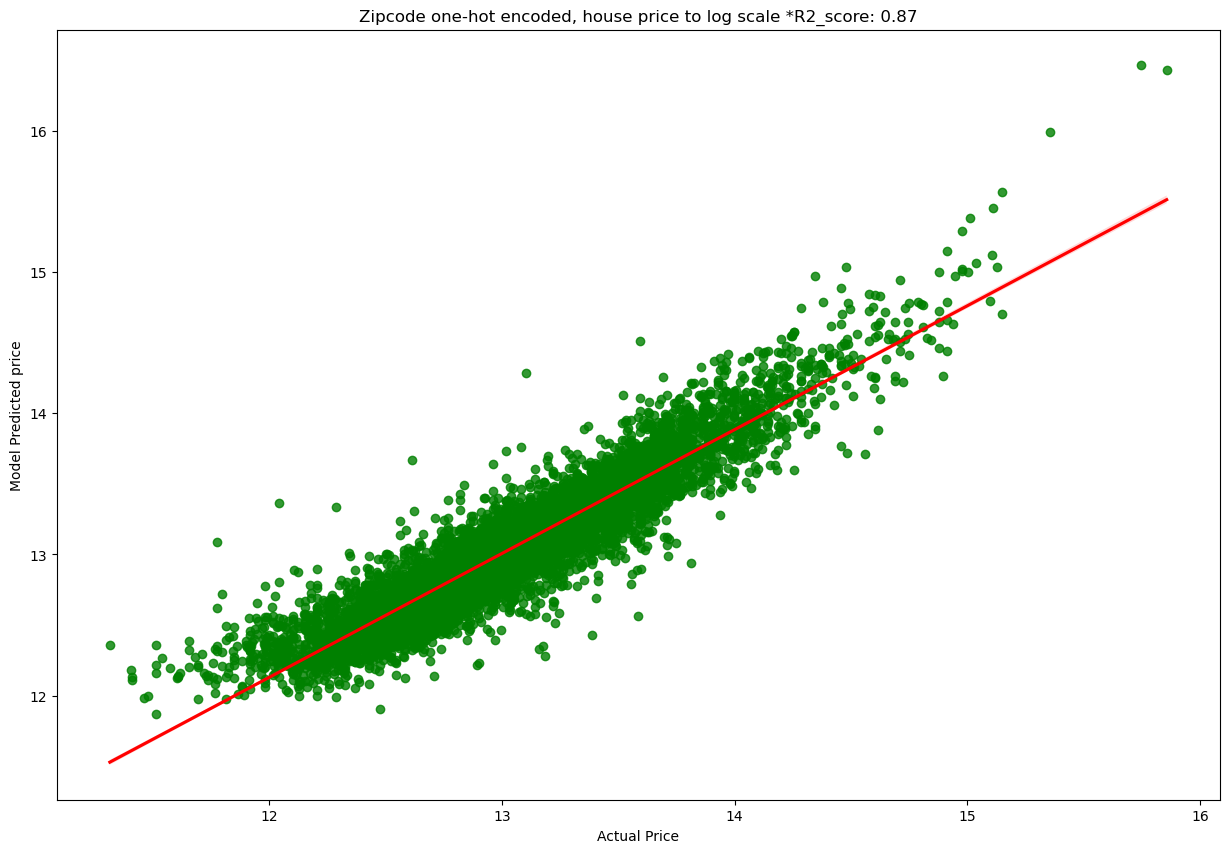

In [41]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=y_test_scaled, y=predictions3, line_kws={"color":"red"}, scatter_kws={"color":"green"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('Zipcode one-hot encoded, house price to log scale *R2_score: 0.87')

#### without one-hot encoding
* R2_score: 0.65
* RMSE: 211865.0
* MAE: 138323.0

#### with one-hot encoding
* R2_score: 0.8
* RMSE: 160493.0
* MAE: 96722.0

#### with one-hot encoding + scaling - slightly improved but similar
* R2_score: 0.8
* RMSE: 160489.0
* MAE: 96737.0

#### with on-hot encoding + scaling + house price to log scale
* R2_score: 0.87

#### Final variables / dataframe 
* df3
* X_train1_scaled, X_test1_scaled, y_train_scaled, y_test_scaled
* lm3.fit(X_train1_scaled, y_train_scaled)
* predictions3 = lm.predict(X_test1_scaled)

#### check the outliers
create result_df to check and remove outliers

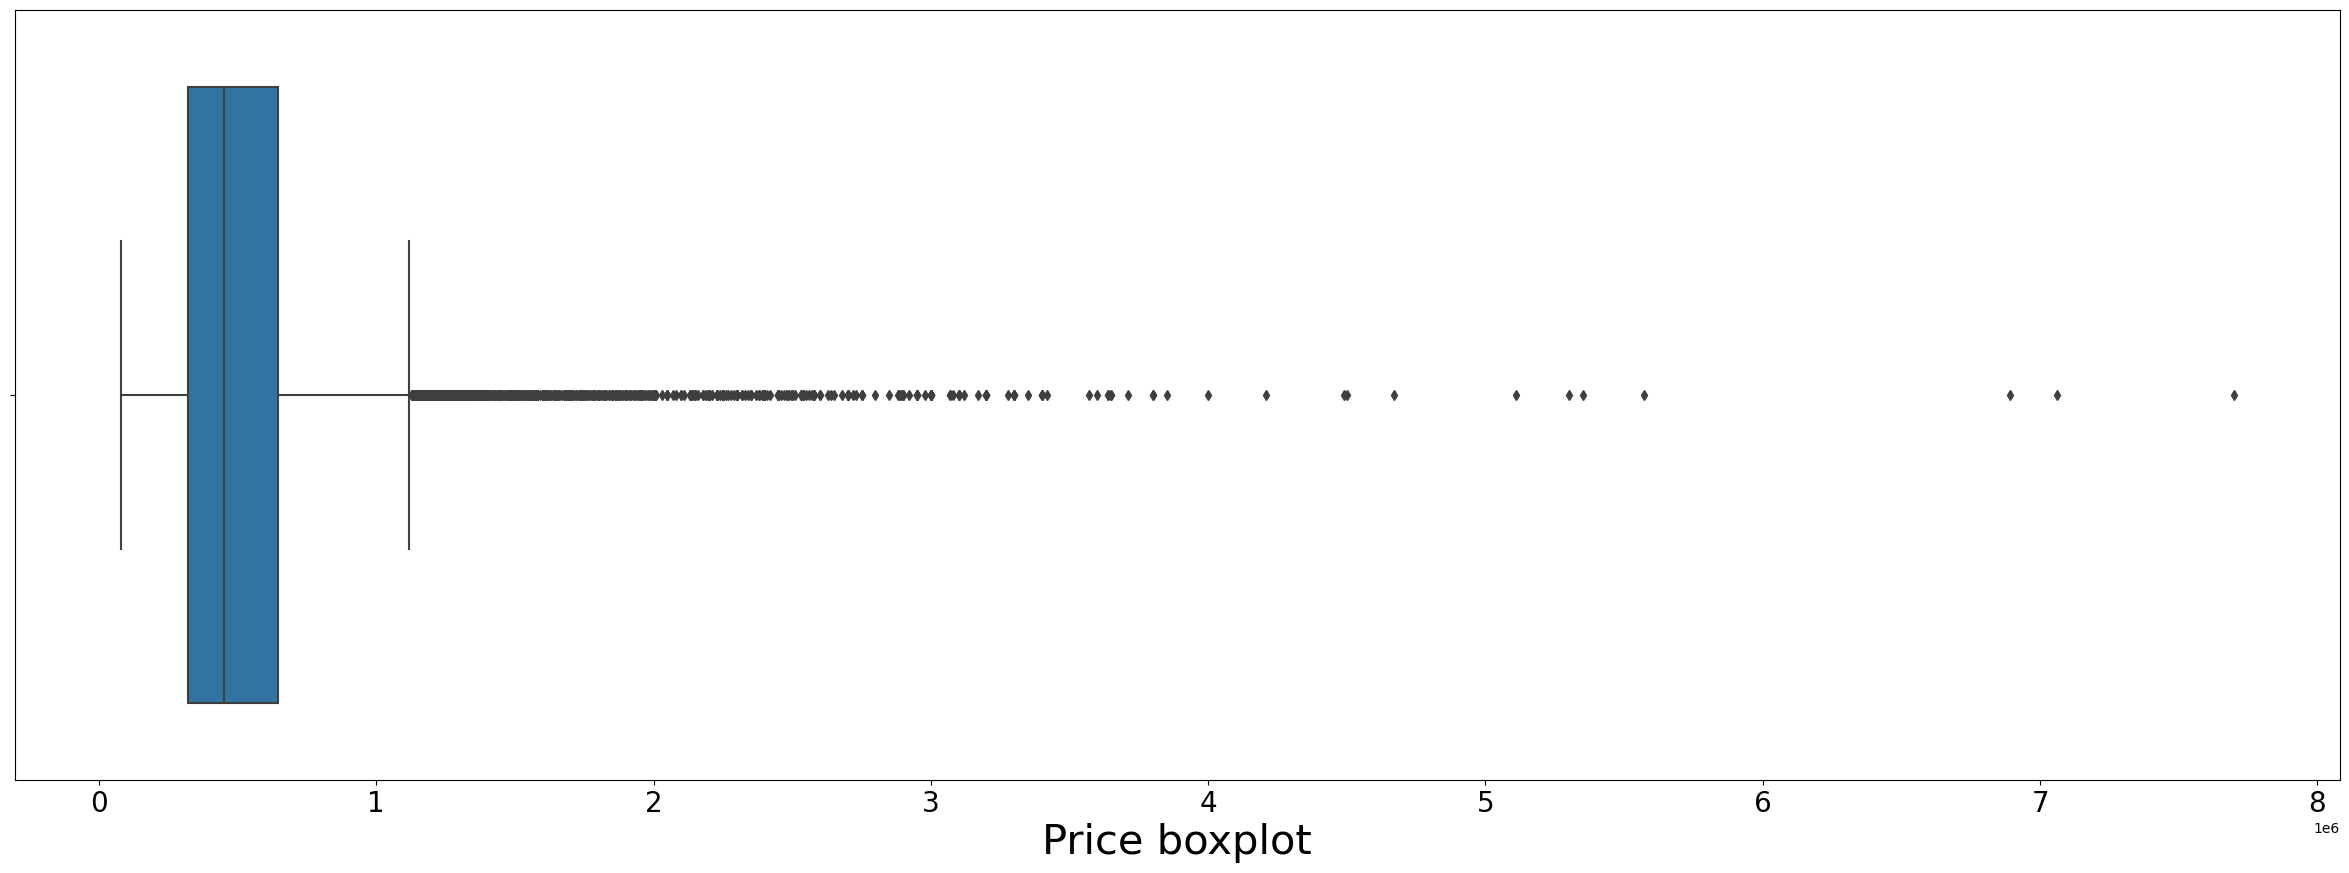

In [42]:
plt.figure(figsize=(30, 10))
plt.xticks(fontsize=20)
sns.boxplot(df3['price'])
plt.xlabel("Price boxplot", fontsize=30)
plt.show()


In [43]:
IQR = abs(np.quantile(df3['price'], .25) - np.quantile(df3['price'], .75)) * 1.5
IQR2 = abs(np.quantile(df3['price'], .25) - np.quantile(df3['price'], .75))
lower_boundary = np.quantile(df3["price"], .25) - IQR
upper_boundary = np.quantile(df3["price"], .75) + IQR

print(IQR2)
lower_boundary, upper_boundary

323000.0


(-162500.0, 1129500.0)

In [44]:
df3

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,1530,1509,360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,1830,7200,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,1020,2007,402101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,1410,1287,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [182]:
df4 = df3[(df3["price"] < 1129500) & (df3["price"] > -0)].sort_values("price")
df4

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
15279,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,1700,10387,78000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
465,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,1200,7500,80000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16184,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,860,9000,81000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8267,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,1140,11250,82000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2139,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,1572,10570,82500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,4,3.25,4750,62365,2.0,0,0,3,11,4750,0,1988,3300,31866,1120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15580,5,1.50,2540,6660,2.0,0,3,4,8,2340,200,1954,2460,9000,1120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
18539,4,3.50,2830,4000,1.5,0,0,3,7,1840,990,1919,2340,4000,1120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14442,4,2.50,3690,11191,1.0,0,3,4,10,2190,1500,1951,3460,8160,1120000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [183]:
# X-y split: here we keep only the data we will use to train the model
X = df4.drop(["price"], axis=1)
#to maintain original value
y = df4["price"]

# Train-test split:
oX_train, oX_test, oy_train, oy_test = train_test_split(X, y, test_size=0.4, random_state=10)

# Log scaling - we will see this on unit 4:
oy_train_scaled = oy_train.apply(lambda x: np.log(x) if x > 0 else 0)
oy_test_scaled = oy_test.apply(lambda x: np.log(x) if x > 0 else 0)

oy_train_scaled

3025     12.519057
8111     12.677950
16300    12.726353
11595    12.896090
13068    13.072290
           ...    
7632     12.939642
408      12.807516
8749     13.504901
8711     12.807620
21403    13.500798
Name: price, Length: 12263, dtype: float64

In [184]:
# Now let's check the model:

lm = LinearRegression()
lm.fit(oX_train, oy_train_scaled)

outlier_predictions = lm.predict(oX_test)
print("R2_score:", round(r2_score(oy_test_scaled, outliar_predictions), 2))
# here we are only checking R2 because MAE and RMSE becomes hard to interpret when we scale the target variable (we will see this in another class)

R2_score: 0.83


Text(0.5, 1.0, 'After remove outliers Zipcode one-hot encoded, house price to log scale *R2_score: 0.83')

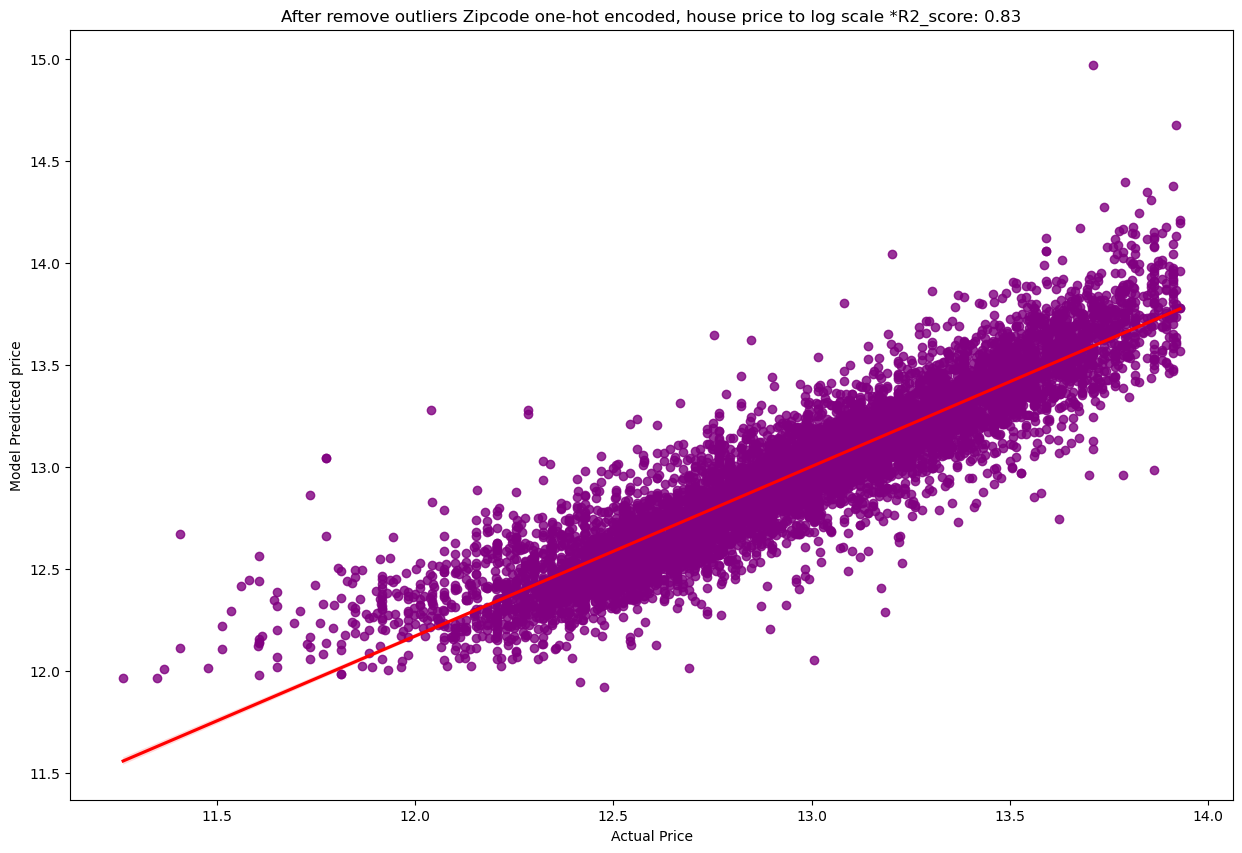

In [185]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=oy_test_scaled, y=outlier_predictions, line_kws={"color":"red"}, scatter_kws={"color":"purple"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('After remove outliers Zipcode one-hot encoded, house price to log scale *R2_score: 0.83')

#### Raw
* R2_score: 0.65
* RMSE: 211865.0
* MAE: 138323.0

#### Zipcode one-hot encoding
* R2_score: 0.8
* RMSE: 162054.0
* MAE: 97463.0

#### Zipcode one-hot encoding + scaling - slightly improved but similar
* R2_score: 0.8
* RMSE: 160489.0
* MAE: 96737.0

#### Zipcode one-hot encoding + scaling + house price to log scale
* R2_score: 0.87

#### Zipcode one-hot encoding + scaling + house price to log scale + remove outliars
* R2_score: 0.83

#### KNN - K Nearest Neighbors

After zipcode one-hot encoding, y to log scaled

In [171]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train1_scaled, y_train_scaled)
knn.score(X_test1_scaled, y_test_scaled)
predictions4 = knn.predict(X_test1_scaled)

In [172]:
rmse = mean_squared_error(y_test_scaled, predictions4, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test_scaled, predictions4)
print("R2_score:", round(r2_score(y_test_scaled, predictions4), 2)) 
print("RMSE:", round(rmse,0))
print("MAE:", round(mae,0))

R2_score: 0.85
RMSE: 0.0
MAE: 0.0


Text(0.5, 1.0, 'KNN Zipcode one-hot encoded, house price to log scale *R2_score: 0.85')

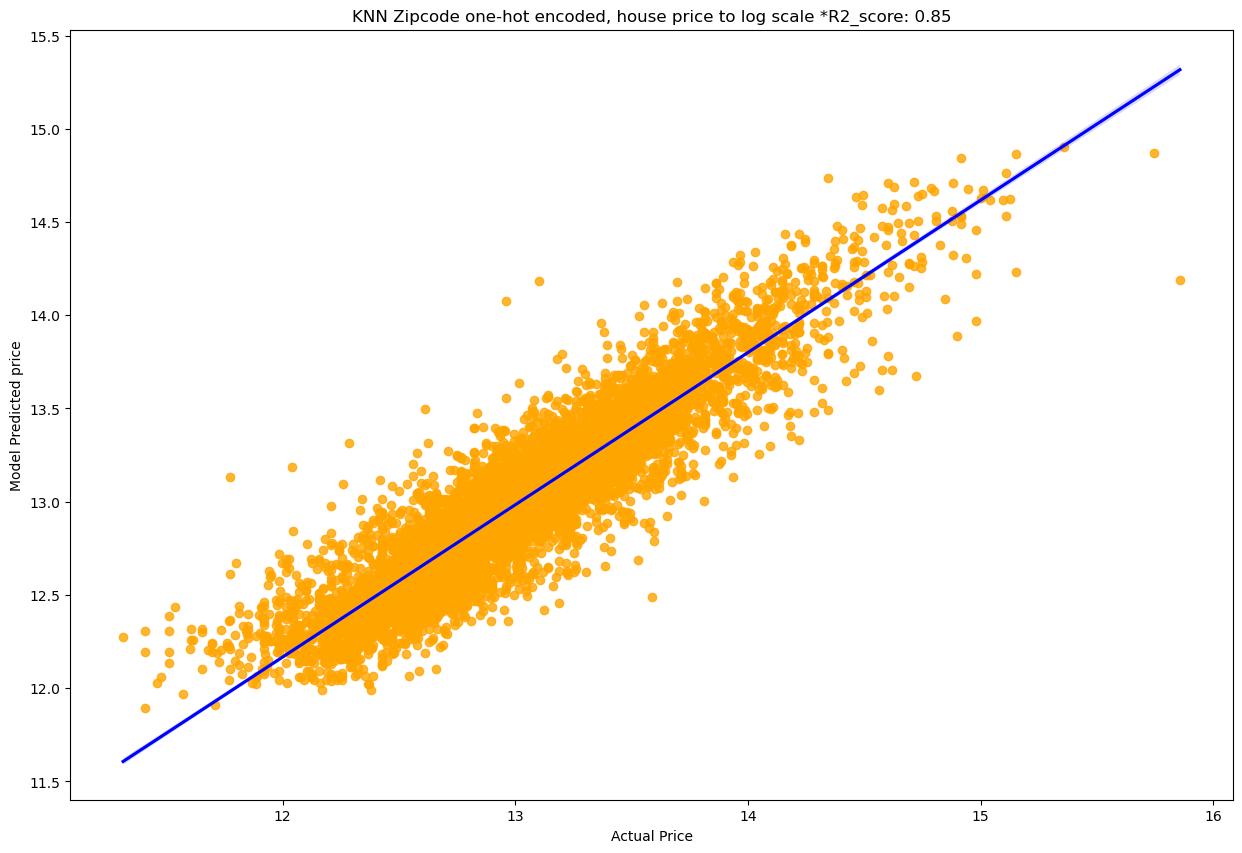

In [175]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=y_test_scaled, y=predictions4, line_kws={"color":"blue"}, scatter_kws={"color":"orange"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('KNN Zipcode one-hot encoded, house price to log scale *R2_score: 0.85')

### KNN model prediction 2 
* zipcode one-hot encoded 
* Price to log scale 
* remove all outliers.

In [179]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(oX_train, oy_train_scaled)
knn.score(oX_test, oy_test_scaled)
predictions5 = knn.predict(oX_test)
print("R2_score:", round(r2_score(oy_test_scaled, predictions5), 2)) 

R2_score: 0.44


Text(0.5, 1.0, 'KNN Remove outliers Zipcode one-hot encoded, house price to log scale *R2_score: 0.44')

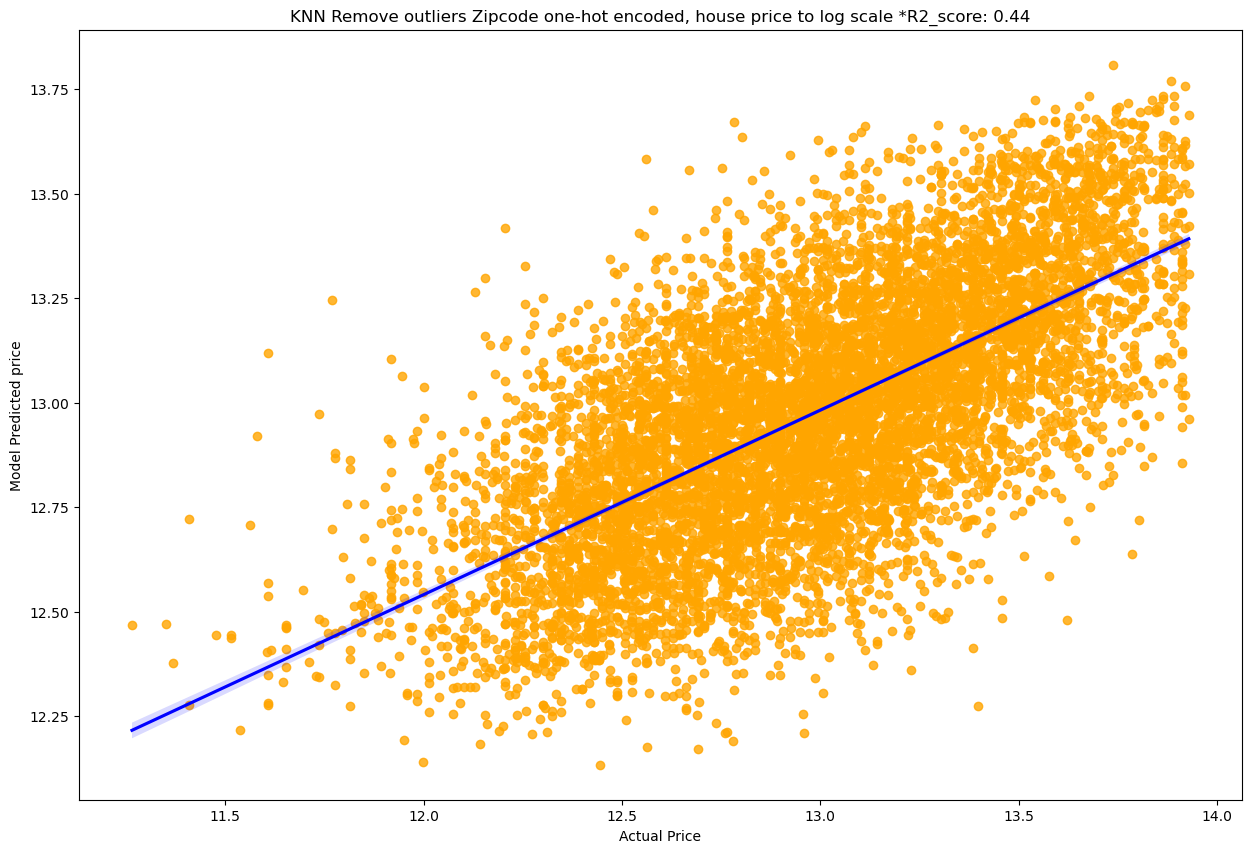

In [181]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=oy_test_scaled, y=predictions5, line_kws={"color":"blue"}, scatter_kws={"color":"orange"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('KNN Remove outliers Zipcode one-hot encoded, house price to log scale *R2_score: 0.44')

#### Random forest Regression

In [189]:
forest = RandomForestRegressor()
forest.fit(X_train1_scaled, y_train_scaled)
forest.score(X_test1_scaled, y_test_scaled)
predictions6 = forest.predict(X_test1_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions6), 2))

0.8280439815560152

Text(0.5, 1.0, 'Radom forest Zipcode one-hot encoded, house price to log scale *R2_score: 0.83')

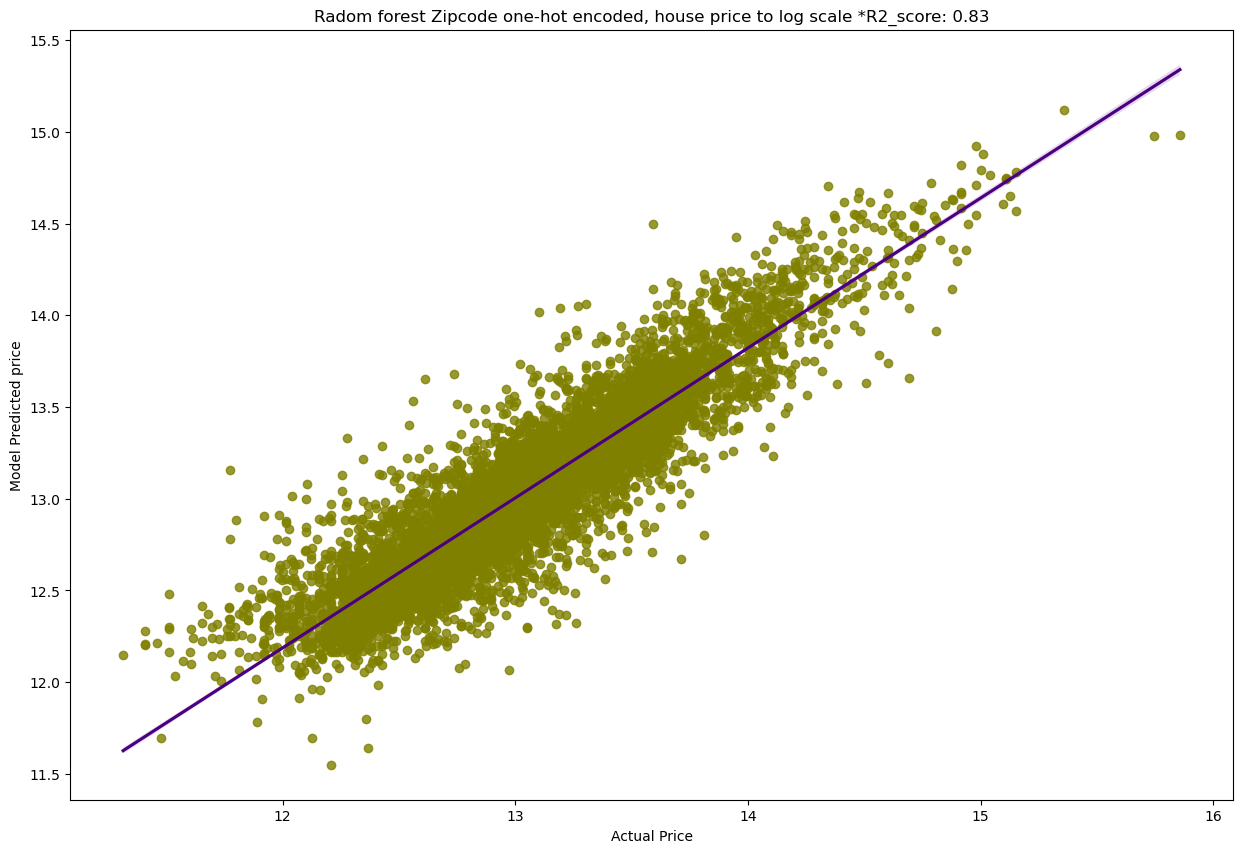

In [193]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=y_test_scaled, y=predictions6, line_kws={"color":"indigo"}, scatter_kws={"color":"olive"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('Radom forest Zipcode one-hot encoded, house price to log scale *R2_score: 0.83')

#### Random forest regression with outlier removed specimen

In [194]:
forest = RandomForestRegressor()
forest.fit(oX_train, oy_train_scaled)
forest.score(oX_test, oy_test_scaled)
predictions7 = forest.predict(oX_test)
print("R2_score:", round(r2_score(oy_test_scaled, predictions7), 2))

R2_score: 0.79


Text(0.5, 1.0, 'Radom forest without outlier, Zipcode one-hot encoded, house price to log scale *R2_score: 0.79')

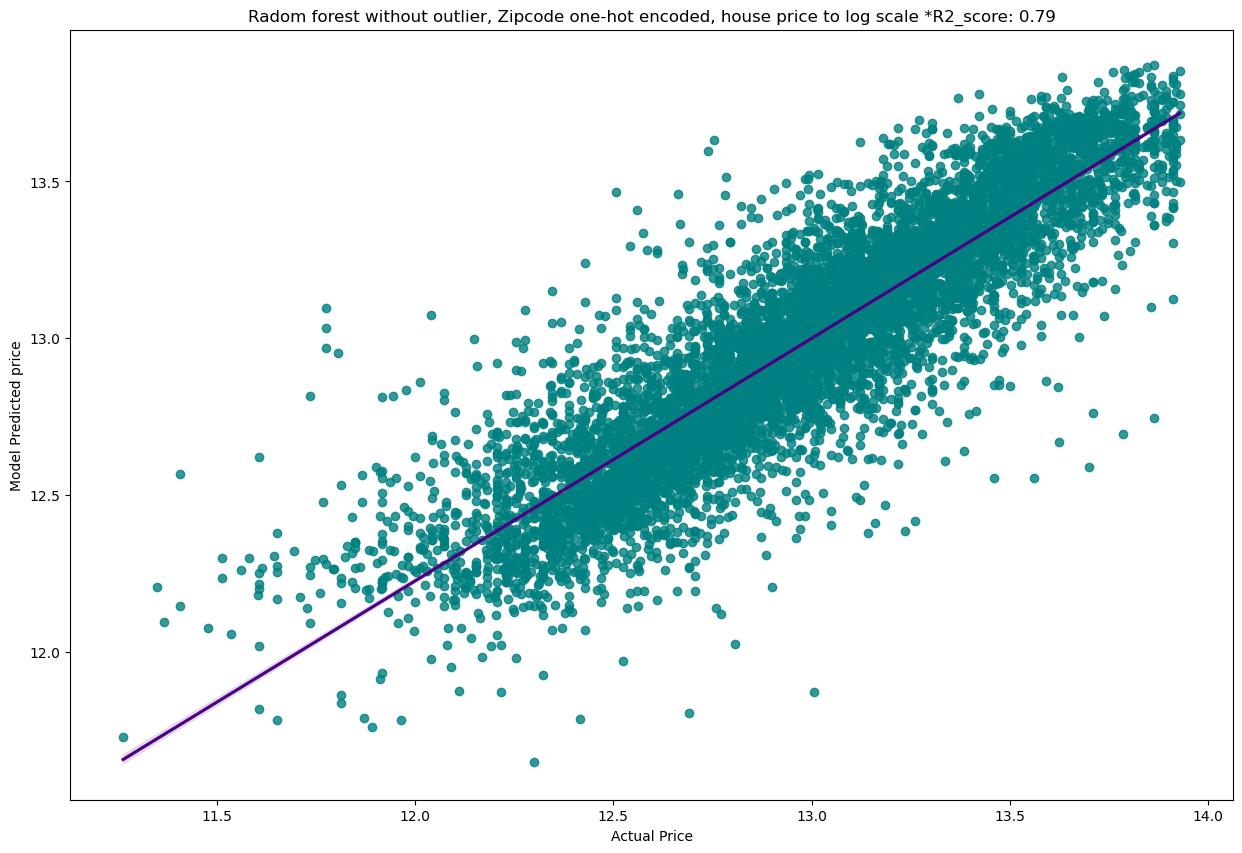

In [197]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=10)
sns.regplot(x=oy_test_scaled, y=predictions7, line_kws={"color":"indigo"}, scatter_kws={"color":"teal"})
plt.xlabel("Actual Price")
plt.ylabel("Model Predicted price")
plt.title('Radom forest without outlier, Zipcode one-hot encoded, house price to log scale *R2_score: 0.79')

In [1]:
oy_test_scaled

NameError: name 'oy_test_scaled' is not defined

### Business Case Conclusions

